<a href="https://colab.research.google.com/github/ailibrarycloud/ai-library-cookbooks/blob/main/Getting_Started_with_AI_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with AI Library

Welcome to AI Library. AI Library APIs is the fastest and most reliable way to integrate AI in your products.
&nbsp;   
&nbsp;    

To get started, you need an AI Library API Key. If you don't already have one, write to write to hello@ailibrary.ai
&nbsp;  
&nbsp;  

With AI Library, you can
- use a single endpoint /generate for generating responses from multiple AI models. Responses are generated in markdown format and can be easily integrated with your solutions
- create Knowledge Bases for grounding AI models using Retrieval Augmented Generation (RAG)
- add data to your Knowledge Bases from various sources like web search, web page, youtube videos and more
&nbsp;  
&nbsp;  

All generations are
- **Explainable** - Get the supporting sources and the relevant section responsible for generating the result
- **Traceable** - Trace the sources back to when, where and by whom they were added
- **Safer** - Define gaurd rails, moderation

&nbsp;  
&nbsp;  
You can find all the API endpoints and the documentation on [Postman](https://www.postman.com/ailibrary/workspace/ai-library-apis/collection/32852595-9a672128-cf10-4f9b-8000-51ab1c107db6?action=share&creator=32852595)
&nbsp;  
&nbsp;  

### Using this Guide

This guide will familiarise you with the basic concepts and endpoints of AI Library. If you have an API Key, it should take less than 5 minutes to complete.

&nbsp;  

#### Basic Concepts

**Models**&nbsp;  
Models are the AI Models that you can use in AI Library. These models can be multi-modal, accepting and generating text, image, audio and video formats. Depending on the modal, you may need to pass text and/or a file.

&nbsp;  

**Knowledge Base**&nbsp;  
Knowledge Bases are documents stored in a hybrid (vector + structured) database. You can think of Knowledge Base as a database for generative AI.

&nbsp;  

**Multi Modal Generation**&nbsp;  
You can generate responses from models in multiple formats - text, image, audio and video. You can use your knowledge base to ground these models with your data.

&nbsp;  

**Files**&nbsp;  
To use files in AI Library, you first need to upload them and then use the file ID with any endpoint. Files are currently persisted unless deleted. Please note, even though you can delete a file anytime, it may affect the explainability of the responses.

&nbsp;  


*Adding to a Knowledge Base from source*
Use the endpoint `/knowledgebase/:id` where id is the knowledge ID of the knowledge base.

The body has two objects - `type` and `options`. These differ with the sources. Refer to the *Add to Knowledge Base* section on [Postman](https://www.postman.com/ailibrary/workspace/ai-library-apis/collection/32852595-9a672128-cf10-4f9b-8000-51ab1c107db6?action=share&creator=32852595)

You can use the following sources -
1. Upload Files to Knowledge Base (most formats can be used including scanned data). However, for structured data like excel, it's best to pre-process it for language models to make sense of the data
2. Latest News
3. Web Search
4. Web Page
5. Confluence Pages and Blogs
6. YouTube Video



![Introducing AI Library [Q1 2024].jpg](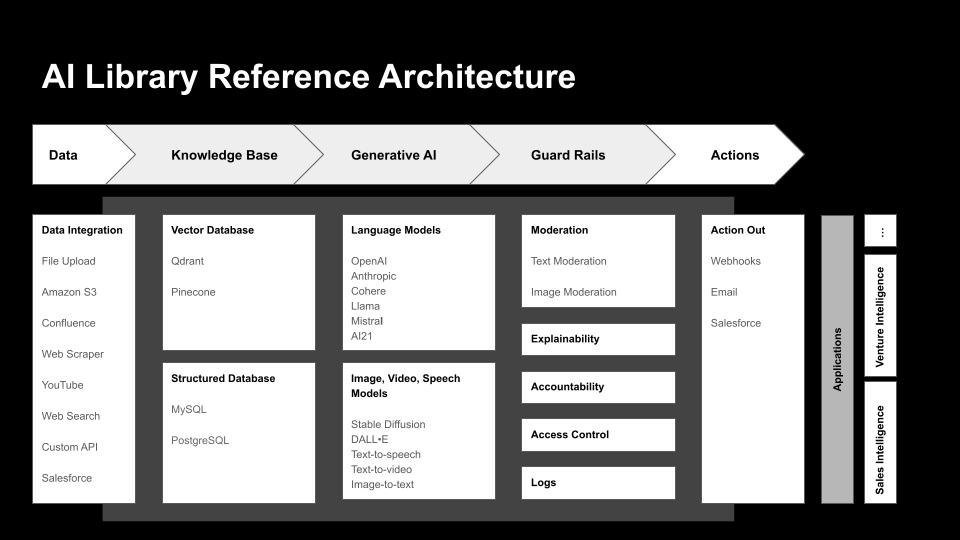)








## Define AI Library Key and domain

1.   List item
2.   List item



To get started, you would need an AI Library API key. You can get a key [here](https://platform.ailibrary.ai).


*Enterprise Customers*

You need to update the DOMAIN as well. Contact your administrator.

In [ ]:
AI_LIBRARY_KEY = "your-key-goes-here" #Update your key
DOMAIN = "https://api.ailibrary.ai"

##Create a Knowledge Base

To create a Knowledge Base for Retrieval Augmented Generation (RAG) and Composition to Augment Language Models (CALM), use the endpoints `/knowledgebase`

- Create a new Knowledge Base `POST /knowledgebase`
- Add data to a Knowledge Base from a variety of sources `PUT /knowledgebase` You can use a variety of sources as described below
- Retrieve your Knowledge Bases `GET /knowledgebase/:id`
- Search a Knowledge Base `POST /knowledgebase/:id`
- Use knowledge base to ground and generate a response from any AI model with POST /generate

In [ ]:
import requests
import json

url = f"{DOMAIN}/v1/knowledgebase"

payload = json.dumps({
  "name": "google colab test kb"
})
headers = {
  'X-Library-Key': AI_LIBRARY_KEY,
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"status":"success","knowledgeId":"googlecolabtestkb_1708997781705663"}


## Get the Knowledge Base ID

In [ ]:
knowledge_base_id = "update-the-knowledge-id-from-the-previous-step" # Update the knowledeId from the response

##Add latest news to a Knowledge Base

In [ ]:
import requests
import json

url = f"{DOMAIN}/v1/knowledgebase/{knowledge_base_id}"

search_terms = ["term_1", "term_2"] # update the search terms

payload = json.dumps({
  "type": "news",
  "options": {
    "search_terms": search_terms
  }
})
headers = {
  'X-Library-Key': AI_LIBRARY_KEY,
  'Content-Type': 'application/json'
}

response = requests.request("PUT", url, headers=headers, data=payload)

print(response.text)


{"status":"success","knowledgeId":"googlecolabtestkb_1708997781705663","data":[{"source":"https://www.msn.com/en-us/money/careersandeducation/the-no-1-money-mistake-to-avoid-if-youre-laid-off-the-long-term-consequences-will-be-very-painful/ar-BB1iA1Bc","text":"Being laid off from your job can be a very stressful time emotionally and financially. But there&#39;s one big mistake you should avoid making with your finances."},{"source":"https://www.msn.com/en-za/news/other/school-calendar-when-does-the-first-term-in-2024-start-and-end/ar-AA1mZ3iy","text":"ALSO READ: 2000 jobs created in Mbombela <b>Term 1</b> of the 2024 academic year is designed to span 10 weeks, encompassing a total of 48 school days. Notably, there are no public holidays during this <b>term</b>."},{"source":"https://www.lowellsun.com/2024/01/28/tewksbury-high-announces-term-1-principals-list-honor-roll-students-2/","text":"TEWKSBURY — Tewksbury Memorial High School Principal Andrew Long has announced the Principal’s Lis

##Generate a response with Knowledge Base

In [ ]:
import requests
import json

url = f"{DOMAIN}/v1/generate"

payload = json.dumps({
  "modelId": "gpt-4@openai",
  "prompt": "Update with your question", #Ask your question.
  "knowledgeId": knowledge_base_id
})
headers = {
  'X-Library-Key': AI_LIBRARY_KEY,
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

{"text":"The latest updates on Resident Evil from the provided context include:\n\n1. A Resident Evil 5 remake is very likely coming down Capcom's pipeline, and it will almost assuredly follow suit in one area of the previous remakes.\n\n2. As the first anniversary of Resident Evil 4 Remake approaches, the game's producer has addressed questions regarding The Darkside Chronicles, particularly whether a certain chapter in the 2009 on-rails shooter is considered canon to the current main story of Resident Evil.\n\n3. Capcom is positioned to equalize the series' tonal and gameplay staples with the release of Resident Evil 9 and a possible Resident Evil 5 remake.\n\n4. There is a new 'Resident Evil' fan film from Andrew Saullo, where fans can travel back to Raccoon City.\n\n5. Claire Redfield, a fan-favorite protagonist from the Resident Evil series, has undergone several character changes over the years.\n\n6. Resident Evil games have been ranked from worst to best, considering the franch